In [1]:
import os , shutil, pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'   # hides INFO/WARNING logs from TF C++
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
img_size = 456
Batch_Size = 8
train_dataset = image_dataset_from_directory(
    r"/home/hamid/ML/Datasets/Men-Women-small/train",
    image_size = (img_size , img_size),
    batch_size = Batch_Size ,
    label_mode = "binary"
)

validation_dataset = image_dataset_from_directory(
    r"/home/hamid/ML/Datasets/Men-Women-small/validation",
    image_size = (img_size , img_size),
    batch_size = Batch_Size ,
    label_mode = "binary"
)

test_dataset = image_dataset_from_directory(
    r"/home/hamid/ML/Datasets/Men-Women-small/test",
    image_size = (img_size , img_size),
    batch_size = Batch_Size ,
    label_mode = "binary"
)

Found 2000 files belonging to 2 classes.


I0000 00:00:1765138257.127802   64888 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5394 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 400 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [3]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [4]:
conv_base = keras.applications.efficientnet.EfficientNetB5(  
    weights = "imagenet",
    include_top = False,
    input_shape = (img_size, img_size, 3)  
)

In [5]:
conv_base.trainable = False # I use it at first run

In [6]:
inputs = keras.Input(shape=(img_size, img_size, 3))
x = data_augmentation(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 456, 456, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 456, 456, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb5 (Functional)     │ (None, 15, 15, 2048)   │    28,513,527 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,038,328 (110.77 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 28,513,527 (108.77 MB)

In [7]:
model.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset ,
    callbacks=callbacks,
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 254ms/step - accuracy: 0.8810 - loss: 0.3175 - val_accuracy: 0.9100 - val_loss: 0.2150
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 244ms/step - accuracy: 0.9320 - loss: 0.1751 - val_accuracy: 0.9300 - val_loss: 0.2016
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 241ms/step - accuracy: 0.9315 - loss: 0.1810 - val_accuracy: 0.9200 - val_loss: 0.2112
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 244ms/step - accuracy: 0.9390 - loss: 0.1627 - val_accuracy: 0.9250 - val_loss: 0.1905
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 238ms/step - accuracy: 0.9475 - loss: 0.1370 - val_accuracy: 0.9175 - val_loss: 0.1979
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 241ms/step - accuracy: 0.9475 - loss: 0.1395 - val_accuracy: 0.9200 - val_loss: 0.2095
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 244ms/step - accuracy: 0.9490 - loss: 0.1316 - val_accuracy: 0.9275 - val_loss: 0.1873
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 241ms/step - accuracy: 0.9520 - loss: 0

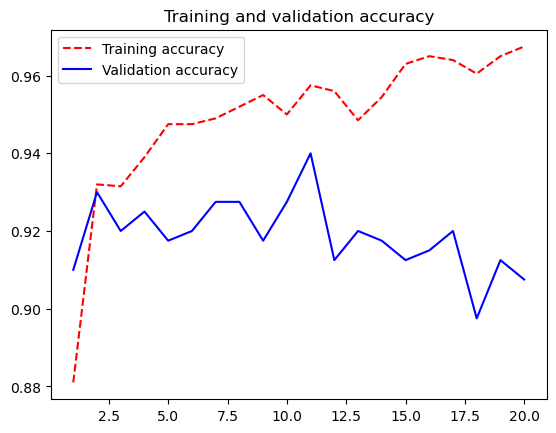

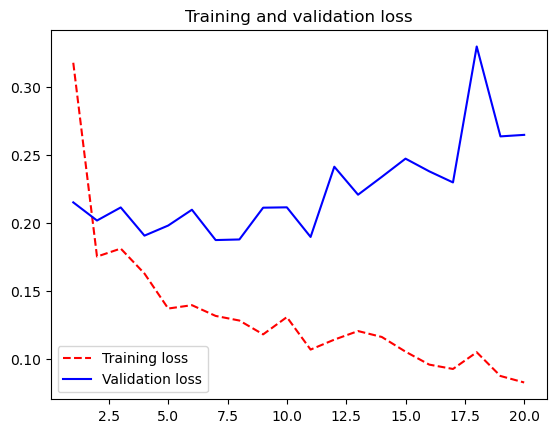

In [8]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [9]:
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - accuracy: 0.9375 - loss: 0.1921
Test accuracy: 0.938


In [10]:
conv_base.trianable = True
for layer in conv_base.layers[:-4]:
    layer.trianable = False

In [11]:
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 251ms/step - accuracy: 0.9665 - loss: 0.0879 - val_accuracy: 0.9050 - val_loss: 0.2617
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 238ms/step - accuracy: 0.9675 - loss: 0.0798 - val_accuracy: 0.9075 - val_loss: 0.2606
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 242ms/step - accuracy: 0.9690 - loss: 0.0721 - val_accuracy: 0.9075 - val_loss: 0.2602
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 248ms/step - accuracy: 0.9745 - loss: 0.0711 - val_accuracy: 0.9075 - val_loss: 0.2603
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 248ms/step - accuracy: 0.9750 - loss: 0.0664 - val_accuracy: 0.9075 - val_loss: 0.2604
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 251ms/step - accuracy: 0.9760 - loss: 0.0612 - val_accuracy: 0.9075 - val_loss: 0.2600
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.9745 - loss: 0.0702 - val_accuracy: 0.9075 - val_loss: 0.2596
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 238ms/step - accuracy: 0.9710 - loss: 0

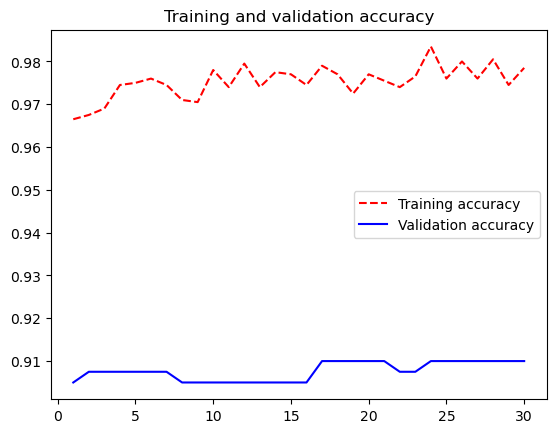

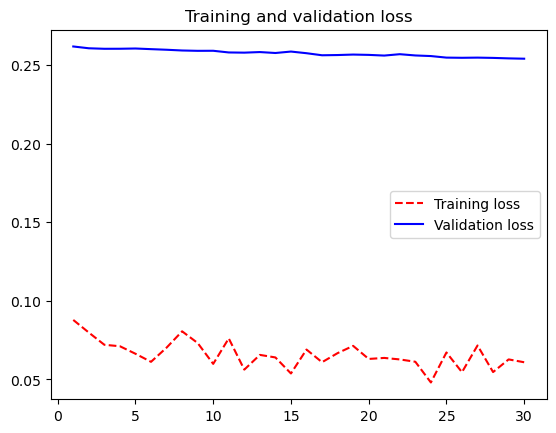

In [12]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [13]:
#this is for Cleaning GPU Memory
tf.keras.backend.clear_session()
#test data
test_model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - accuracy: 0.9300 - loss: 0.2558
Test accuracy: 0.930
